<a href="https://colab.research.google.com/github/pbethmac/IT7103/blob/main/Assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [ ]:
df = pd.read_csv("auto-mpg.csv")

In [ ]:
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# Convert 'horsepower'
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

In [ ]:
# Visualize necessary columns
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
categorical_columns = ['origin', 'car name']

In [ ]:
# Check distribution of numeric columns
symmetric_numeric = []
skewed_numeric = []

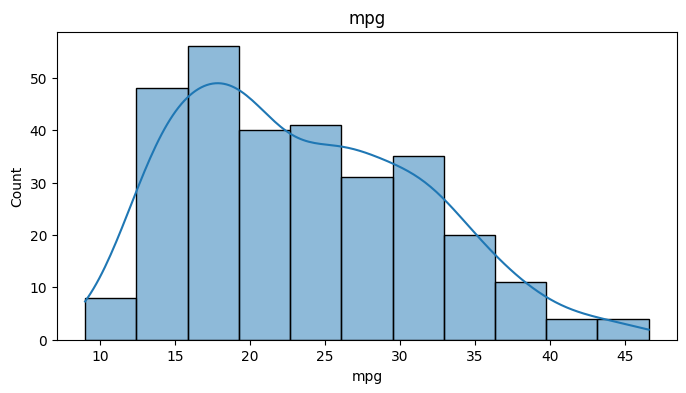

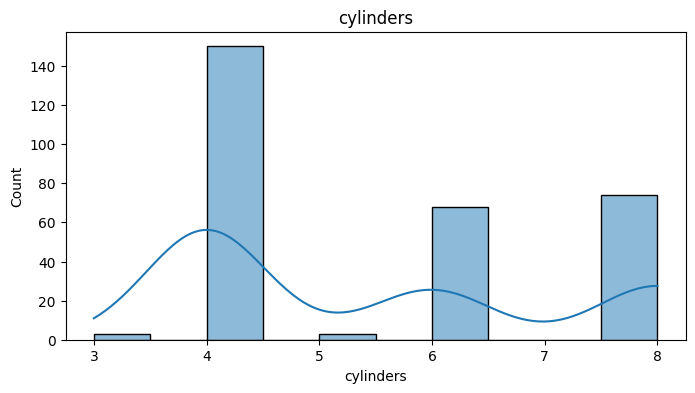

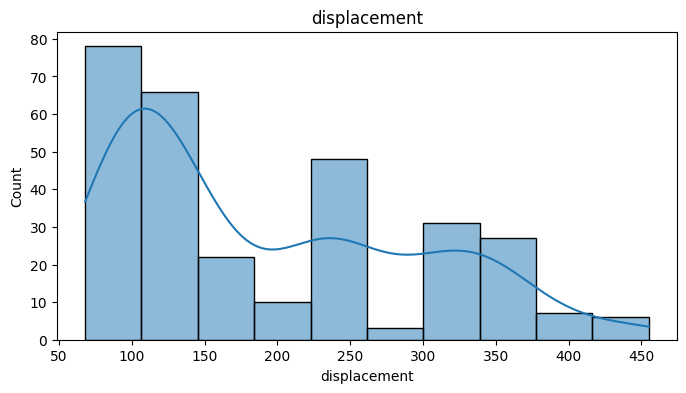

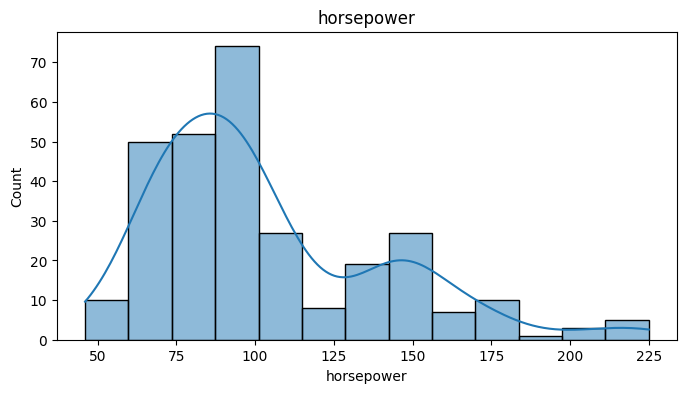

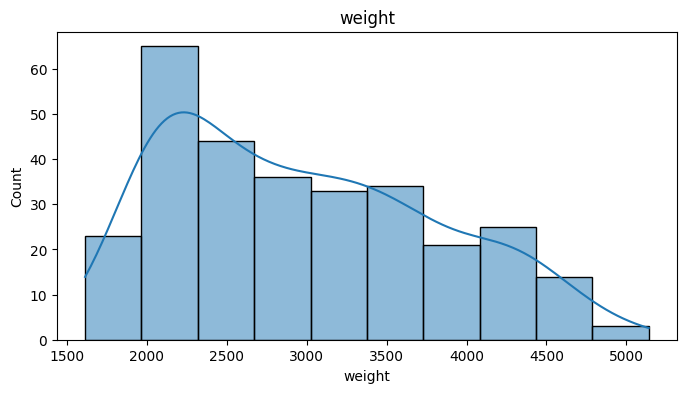

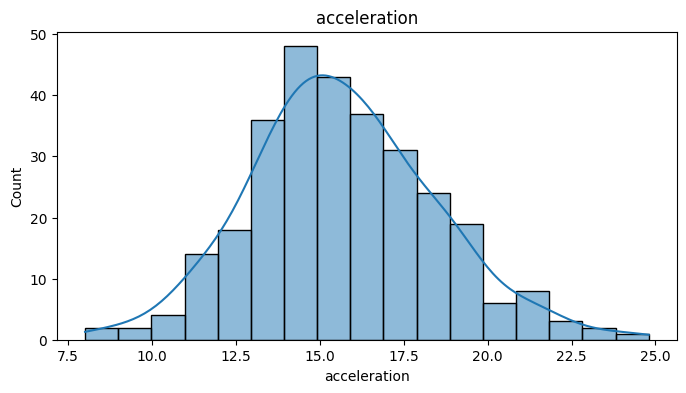

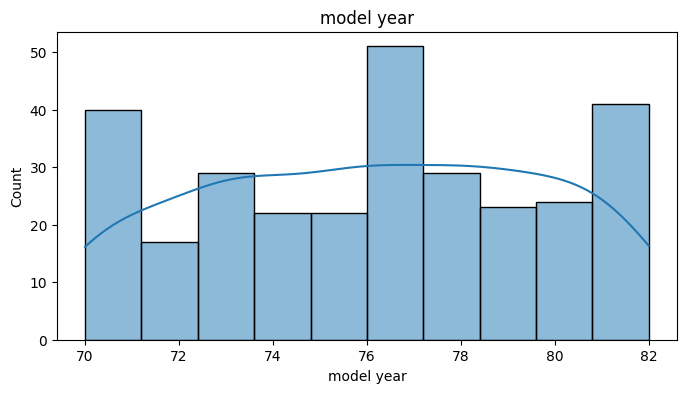

Symmetric Numeric Columns: ['mpg', 'weight', 'acceleration', 'model year']
Skewed Numeric Columns: ['cylinders', 'displacement', 'horsepower']
Categorical Columns: ['origin', 'car name']


In [ ]:
# Check distribution of numeric columns
symmetric_numeric = []
skewed_numeric = []

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(col)
    plt.show()

    skewness = train_df[col].skew()
    if skewness > 0.5 or skewness < -0.5:
        skewed_numeric.append(col)
    else:
        symmetric_numeric.append(col)

print("Symmetric Numeric Columns:", symmetric_numeric)
print("Skewed Numeric Columns:", skewed_numeric)
print("Categorical Columns:", categorical_columns)

In [ ]:
# Define transformation functions
log_transformer = FunctionTransformer(np.log1p)

In [ ]:
# Build the pipeline
numeric_features = ['mpg'] + symmetric_numeric + skewed_numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_symmetric', numeric_transformer, symmetric_numeric),
        ('num_skewed', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('log_transform', log_transformer),
            ('scaler', StandardScaler())
        ]), skewed_numeric),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Train the pipeline on the training data and perform transformation
X_train_processed = preprocessor.fit_transform(train_df)
X_test_processed = preprocessor.transform(test_df)

# Print the shape of the processed training data and processed testing data
print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Testing Data:", X_test_processed.shape)


Shape of Processed Training Data: (298, 242)
Shape of Processed Testing Data: (100, 242)
